<a href="https://colab.research.google.com/github/EhabYasser25/YOLO-Shape-Detector/blob/main/YOLO_Shape_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 0: Libraries preparation

> ## Install necessary libraries

In [ ]:
!pip install ultralytics
!pip install roboflow

> ## Import necessary libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
from ultralytics.utils.plotting import Annotator
from roboflow import Roboflow

# Step 1: Data preparation

> ## Change the root path to drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
desired_path = '/content/drive/MyDrive/Colab Data/YOLO Shape Detector/'
os.chdir(desired_path)

> ## Discover the dataset

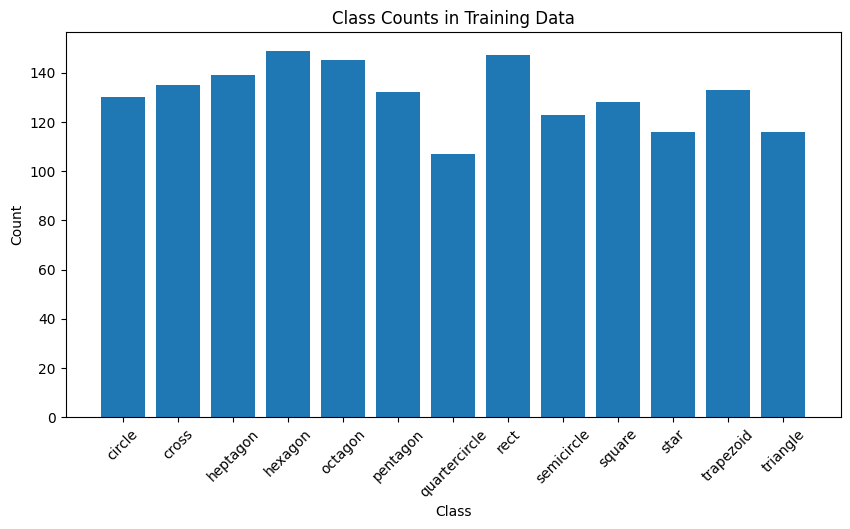

In [4]:
# Show the classes count in the train set

# Define initial arrays
dataset_dir = 'train/labels/'
class_names = ['circle', 'cross', 'heptagon', 'hexagon', 'octagon', 'pentagon', 'quartercircle', 'rect', 'semicircle', 'square', 'star', 'trapezoid', 'triangle']
class_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Iterate on all labels
for filename in os.listdir(dataset_dir):
  with open(f'{dataset_dir}{filename}', 'r') as file:
    lines = file.readlines()
    for line in lines:
      class_id = int(line.split()[0])
      class_counts[class_id] += 1

# Plot drawing
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Counts in Training Data')
plt.xticks(rotation=45)

plt.show()

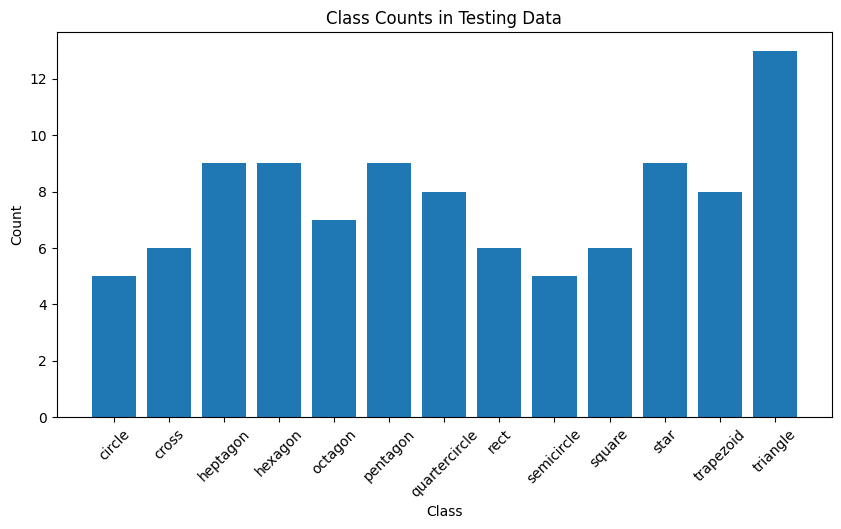

In [5]:
# Show the classes count in the test set

# Define initial arrays
dataset_dir = 'test/labels/'
class_names = ['circle', 'cross', 'heptagon', 'hexagon', 'octagon', 'pentagon', 'quartercircle', 'rect', 'semicircle', 'square', 'star', 'trapezoid', 'triangle']
class_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Iterate on all labels
for filename in os.listdir(dataset_dir):
  with open(f'{dataset_dir}{filename}', 'r') as file:
    lines = file.readlines()
    for line in lines:
      class_id = int(line.split()[0])
      class_counts[class_id] += 1

# Plot drawing
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Counts in Testing Data')
plt.xticks(rotation=45)

plt.show()

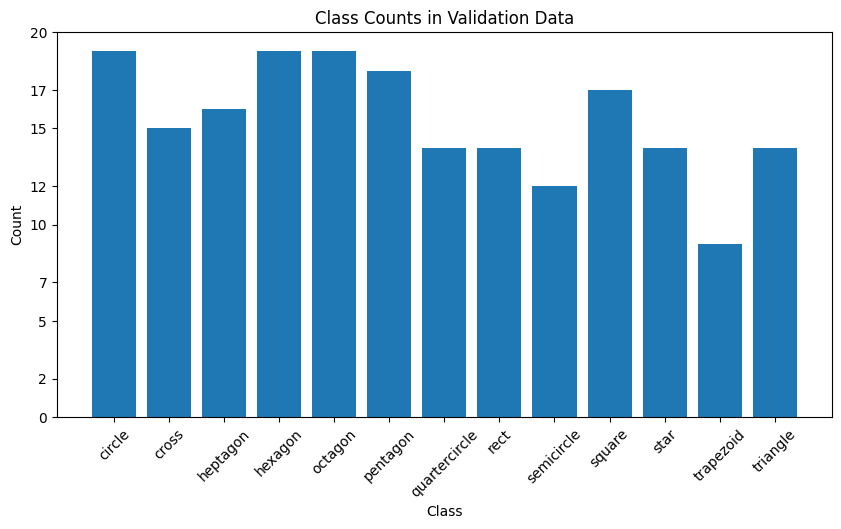

In [6]:
# Show the classes count in the validation set

# Define initial arrays
dataset_dir = 'valid/labels/'
class_names = ['circle', 'cross', 'heptagon', 'hexagon', 'octagon', 'pentagon', 'quartercircle', 'rect', 'semicircle', 'square', 'star', 'trapezoid', 'triangle']
class_counts = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

# Iterate on all labels
for filename in os.listdir(dataset_dir):
  with open(f'{dataset_dir}{filename}', 'r') as file:
    lines = file.readlines()
    for line in lines:
      class_id = int(line.split()[0])
      class_counts[class_id] += 1

# Plot drawing
plt.figure(figsize=(10, 5))
plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.yticks(list(map(int, plt.yticks()[0])))
plt.title('Class Counts in Validation Data')
plt.xticks(rotation=45)

plt.show()

# Step 2: Training

> ## Train the model

In [ ]:
# Choosing the model
model = YOLO("yolov8x.yaml")

# Training the model
results = model.train(data='data.yaml', epochs=30)


                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640

In [ ]:
# Choosing the model
model = YOLO("yolov8x.yaml")

# Training the model
results = model.train(data='data.yaml', epochs=40)


                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics.nn.modules.conv.Conv             [640

> ## Load the model

In [13]:
model = YOLO("runs/detect/train/weights/best.pt")

> ## Display the results

In [ ]:
# Show the mAP

metrics = model.val(conf=0.4)
print(f'mAP on validation dataset:{metrics.box.map}')

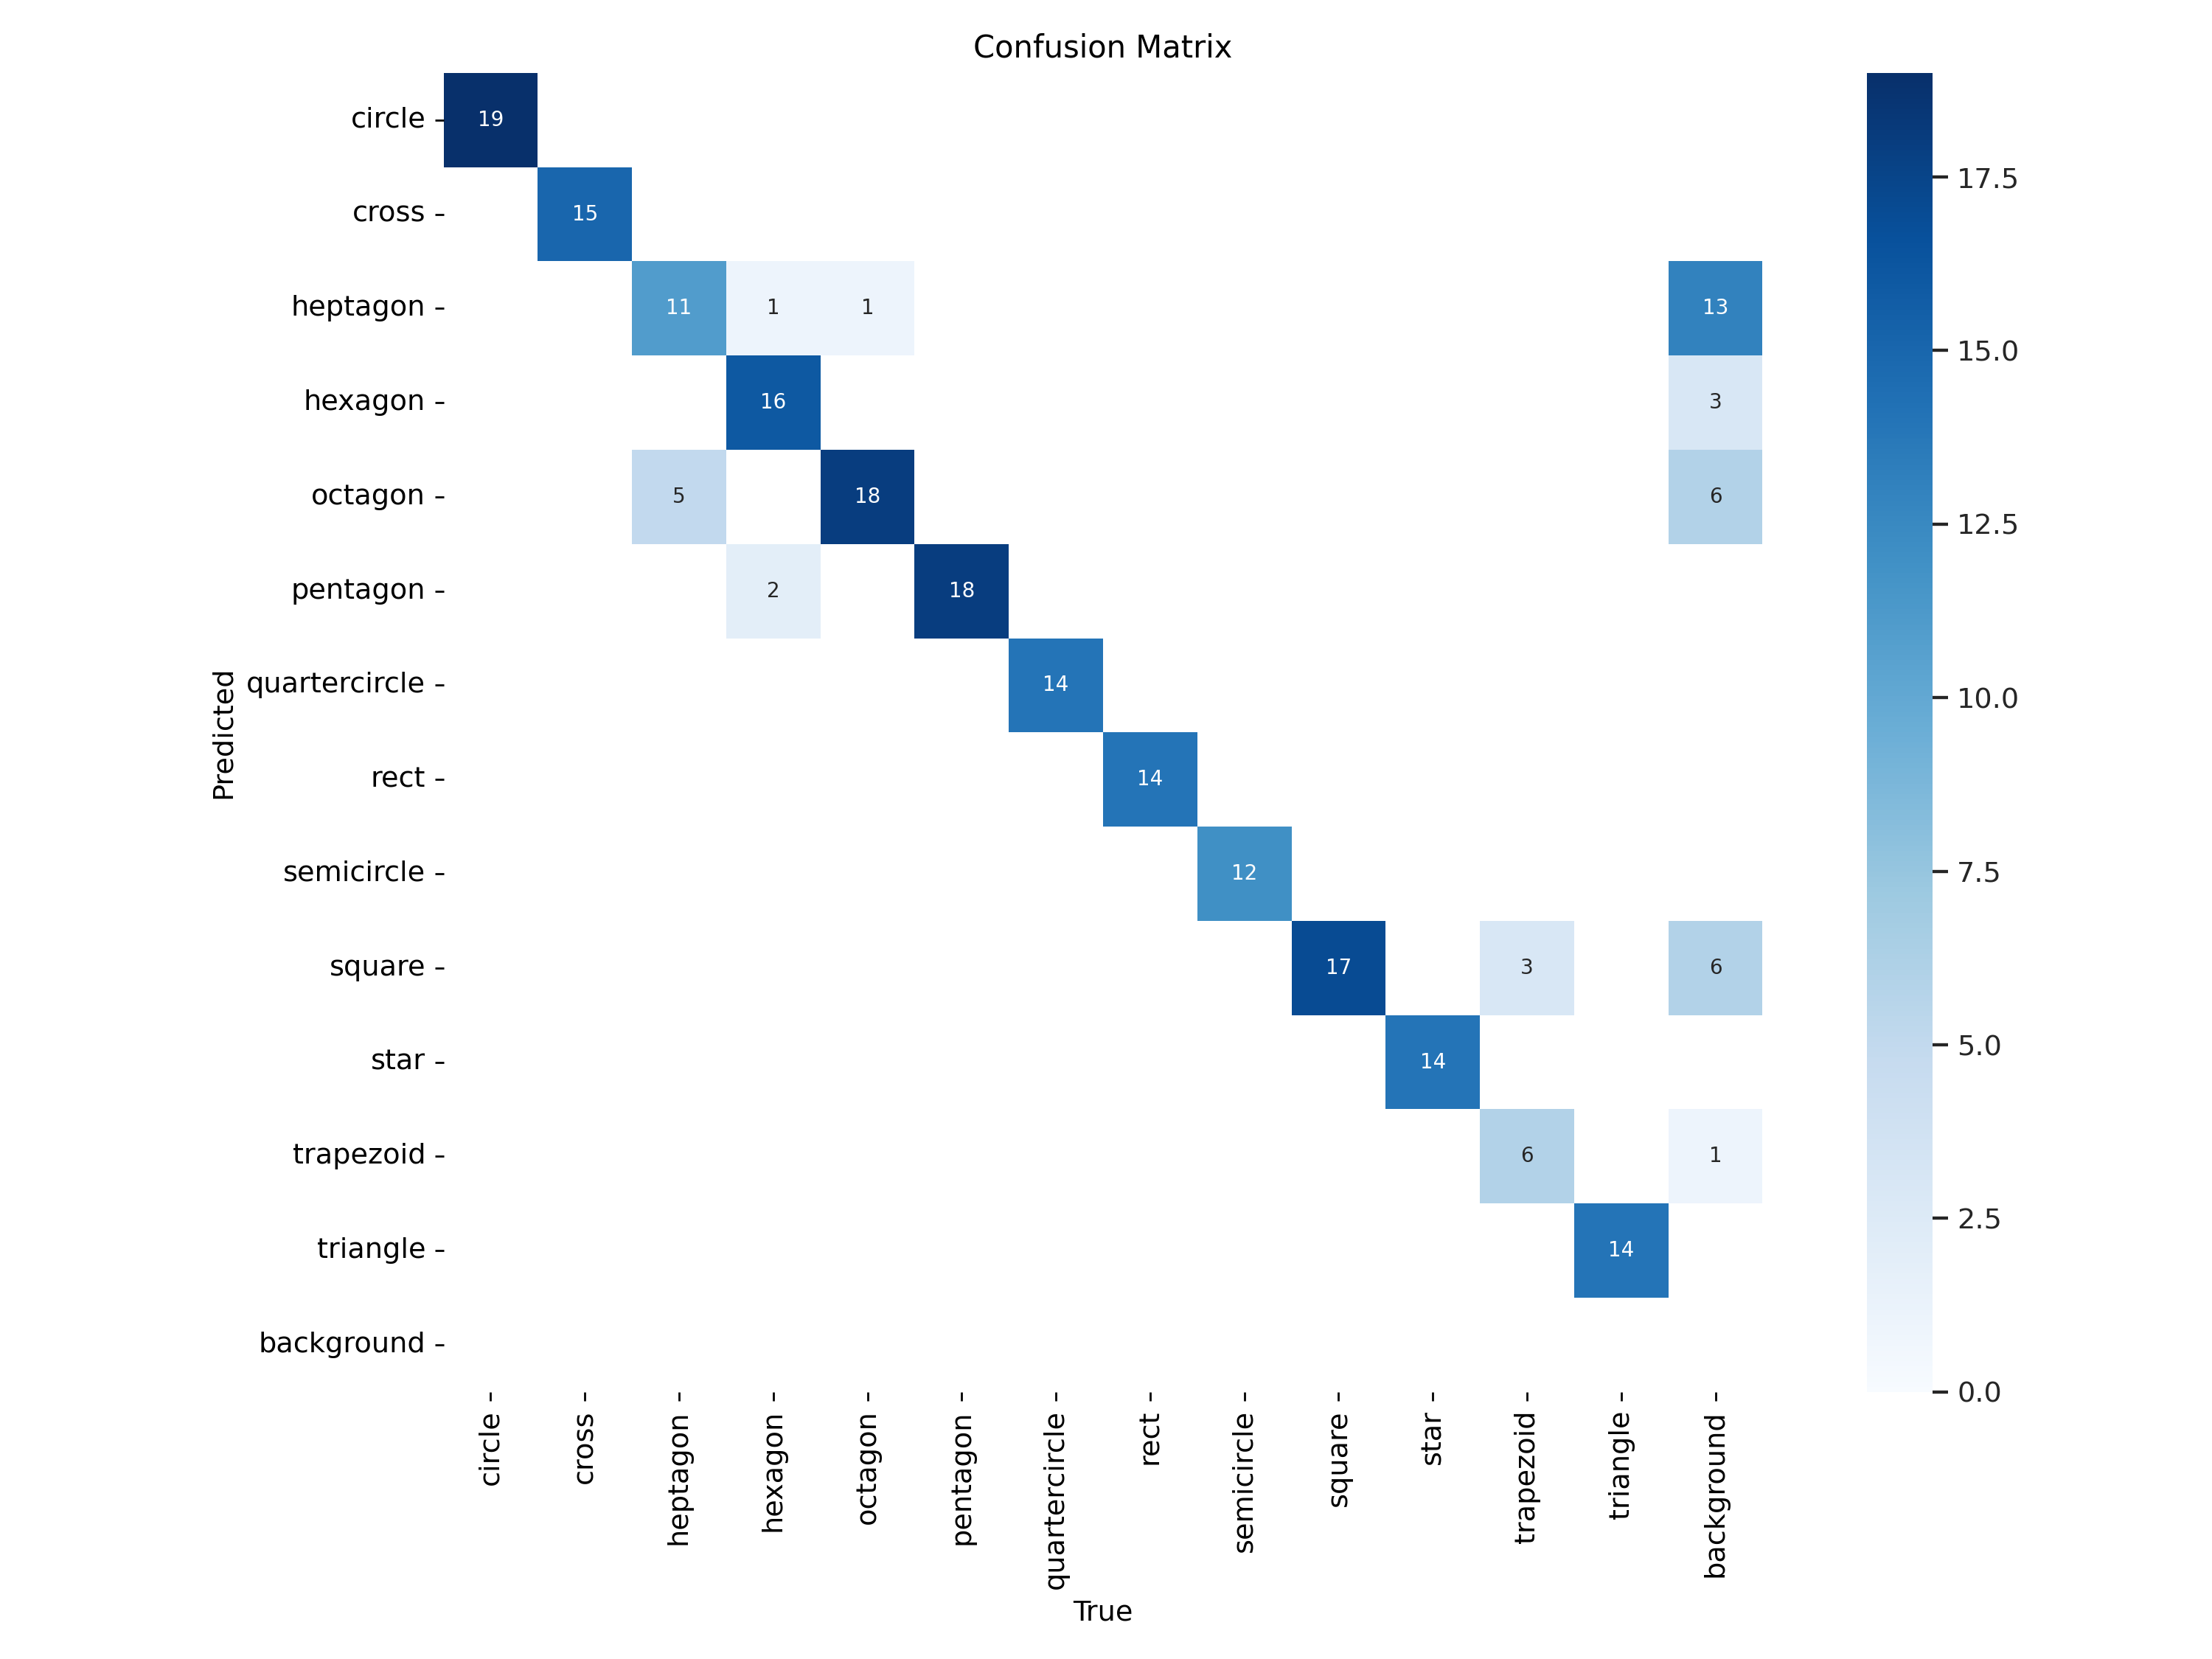

In [ ]:
# Show the confusion matrix

confusion_matrix = cv2.imread('runs/detect/train/confusion_matrix.png')
cv2_imshow(confusion_matrix)

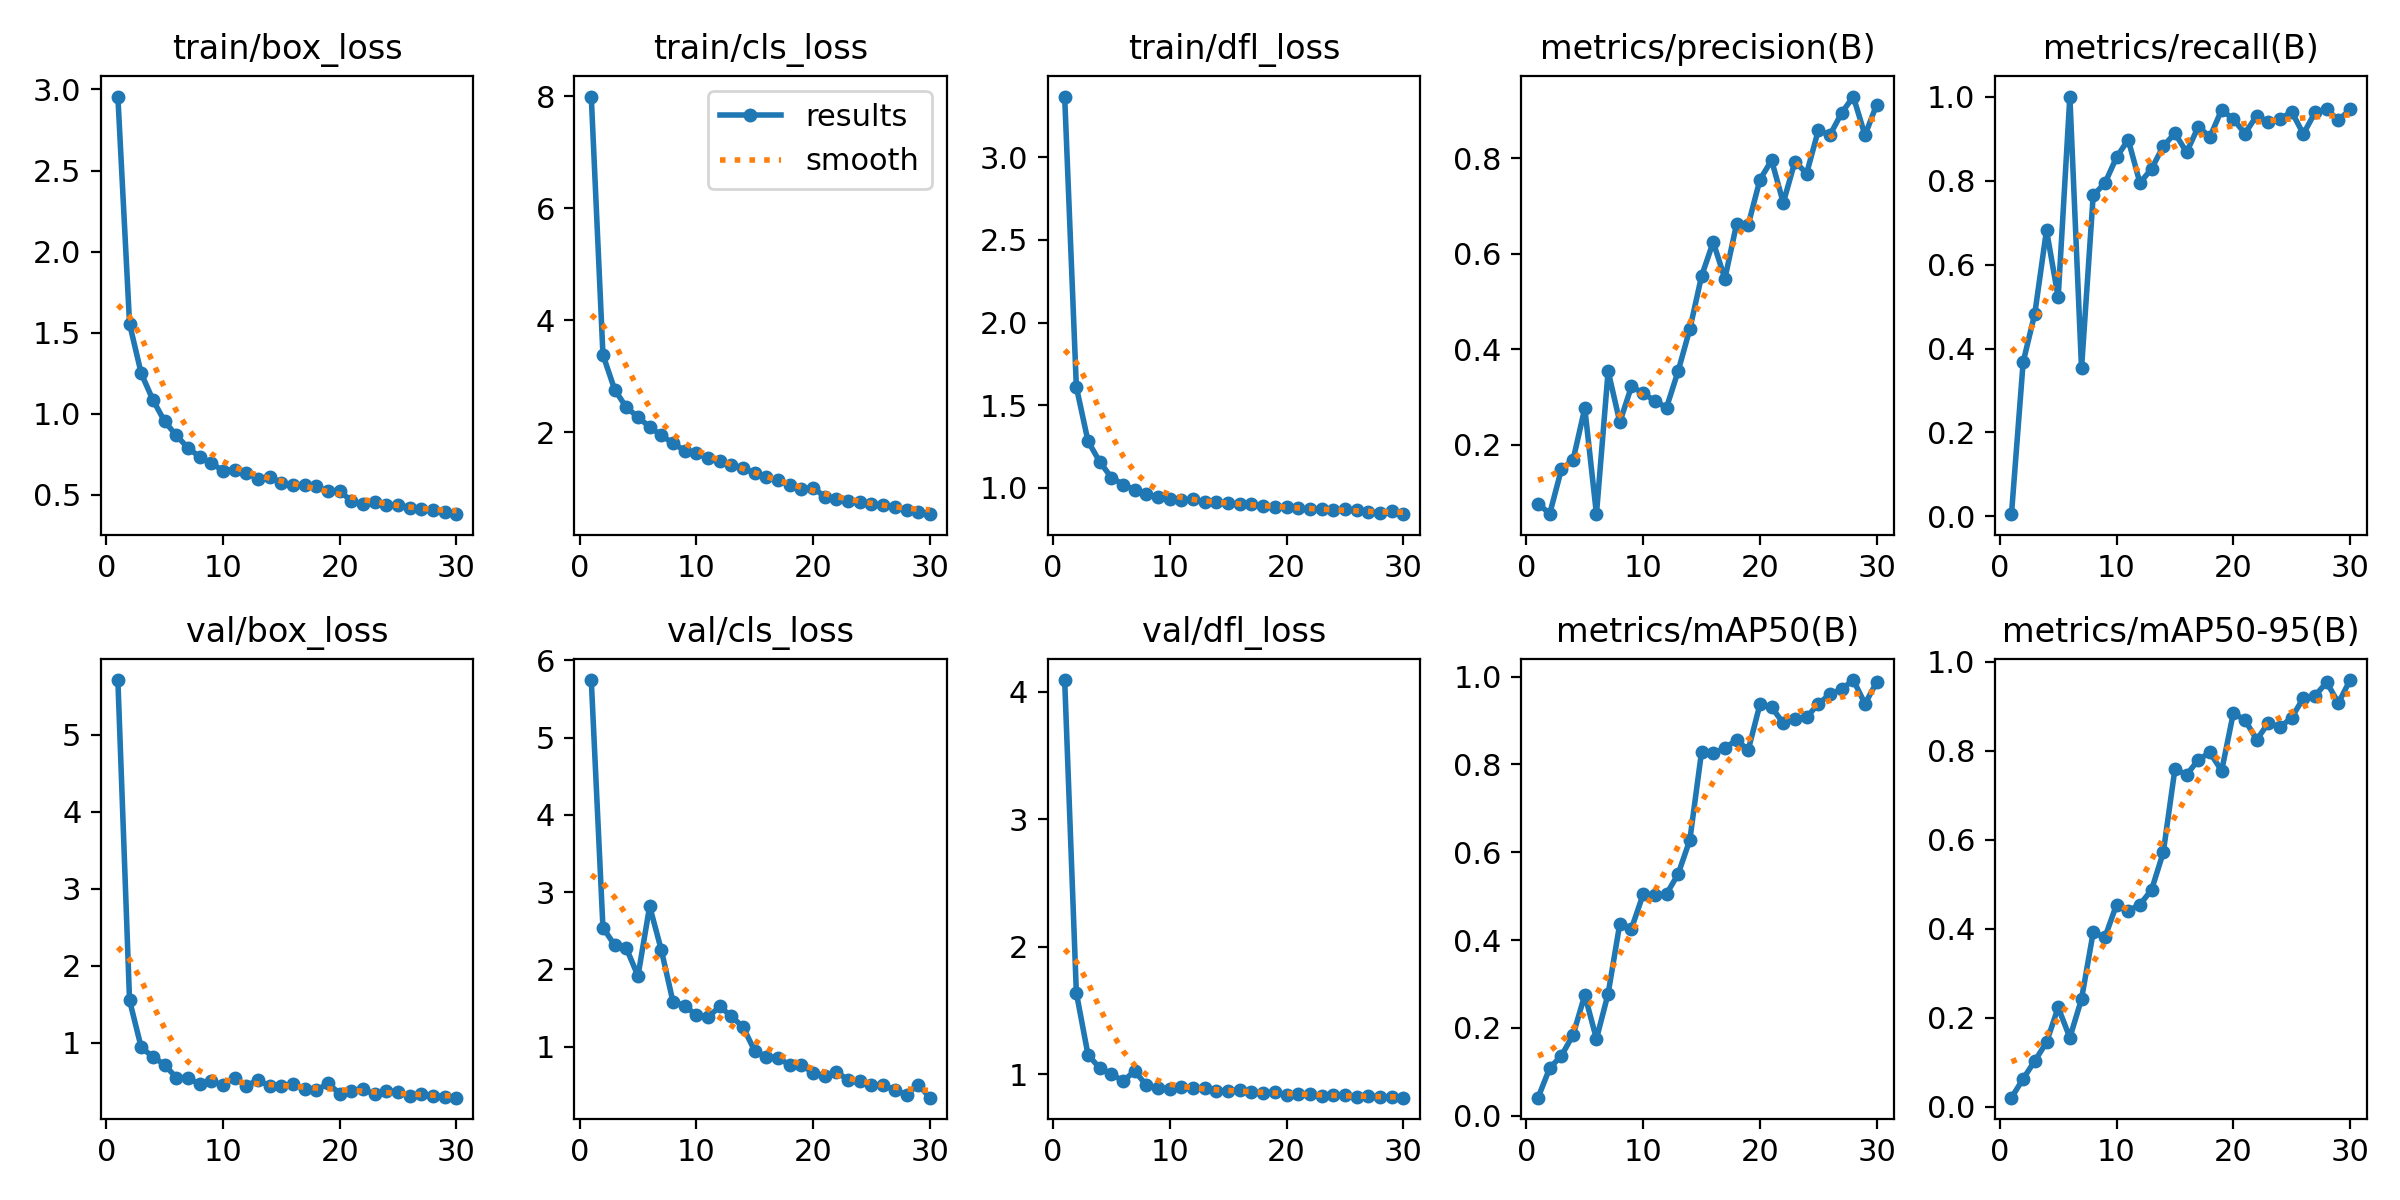

In [ ]:
# Show the results

results = cv2.imread('runs/detect/train/results.png')
cv2_imshow(results)

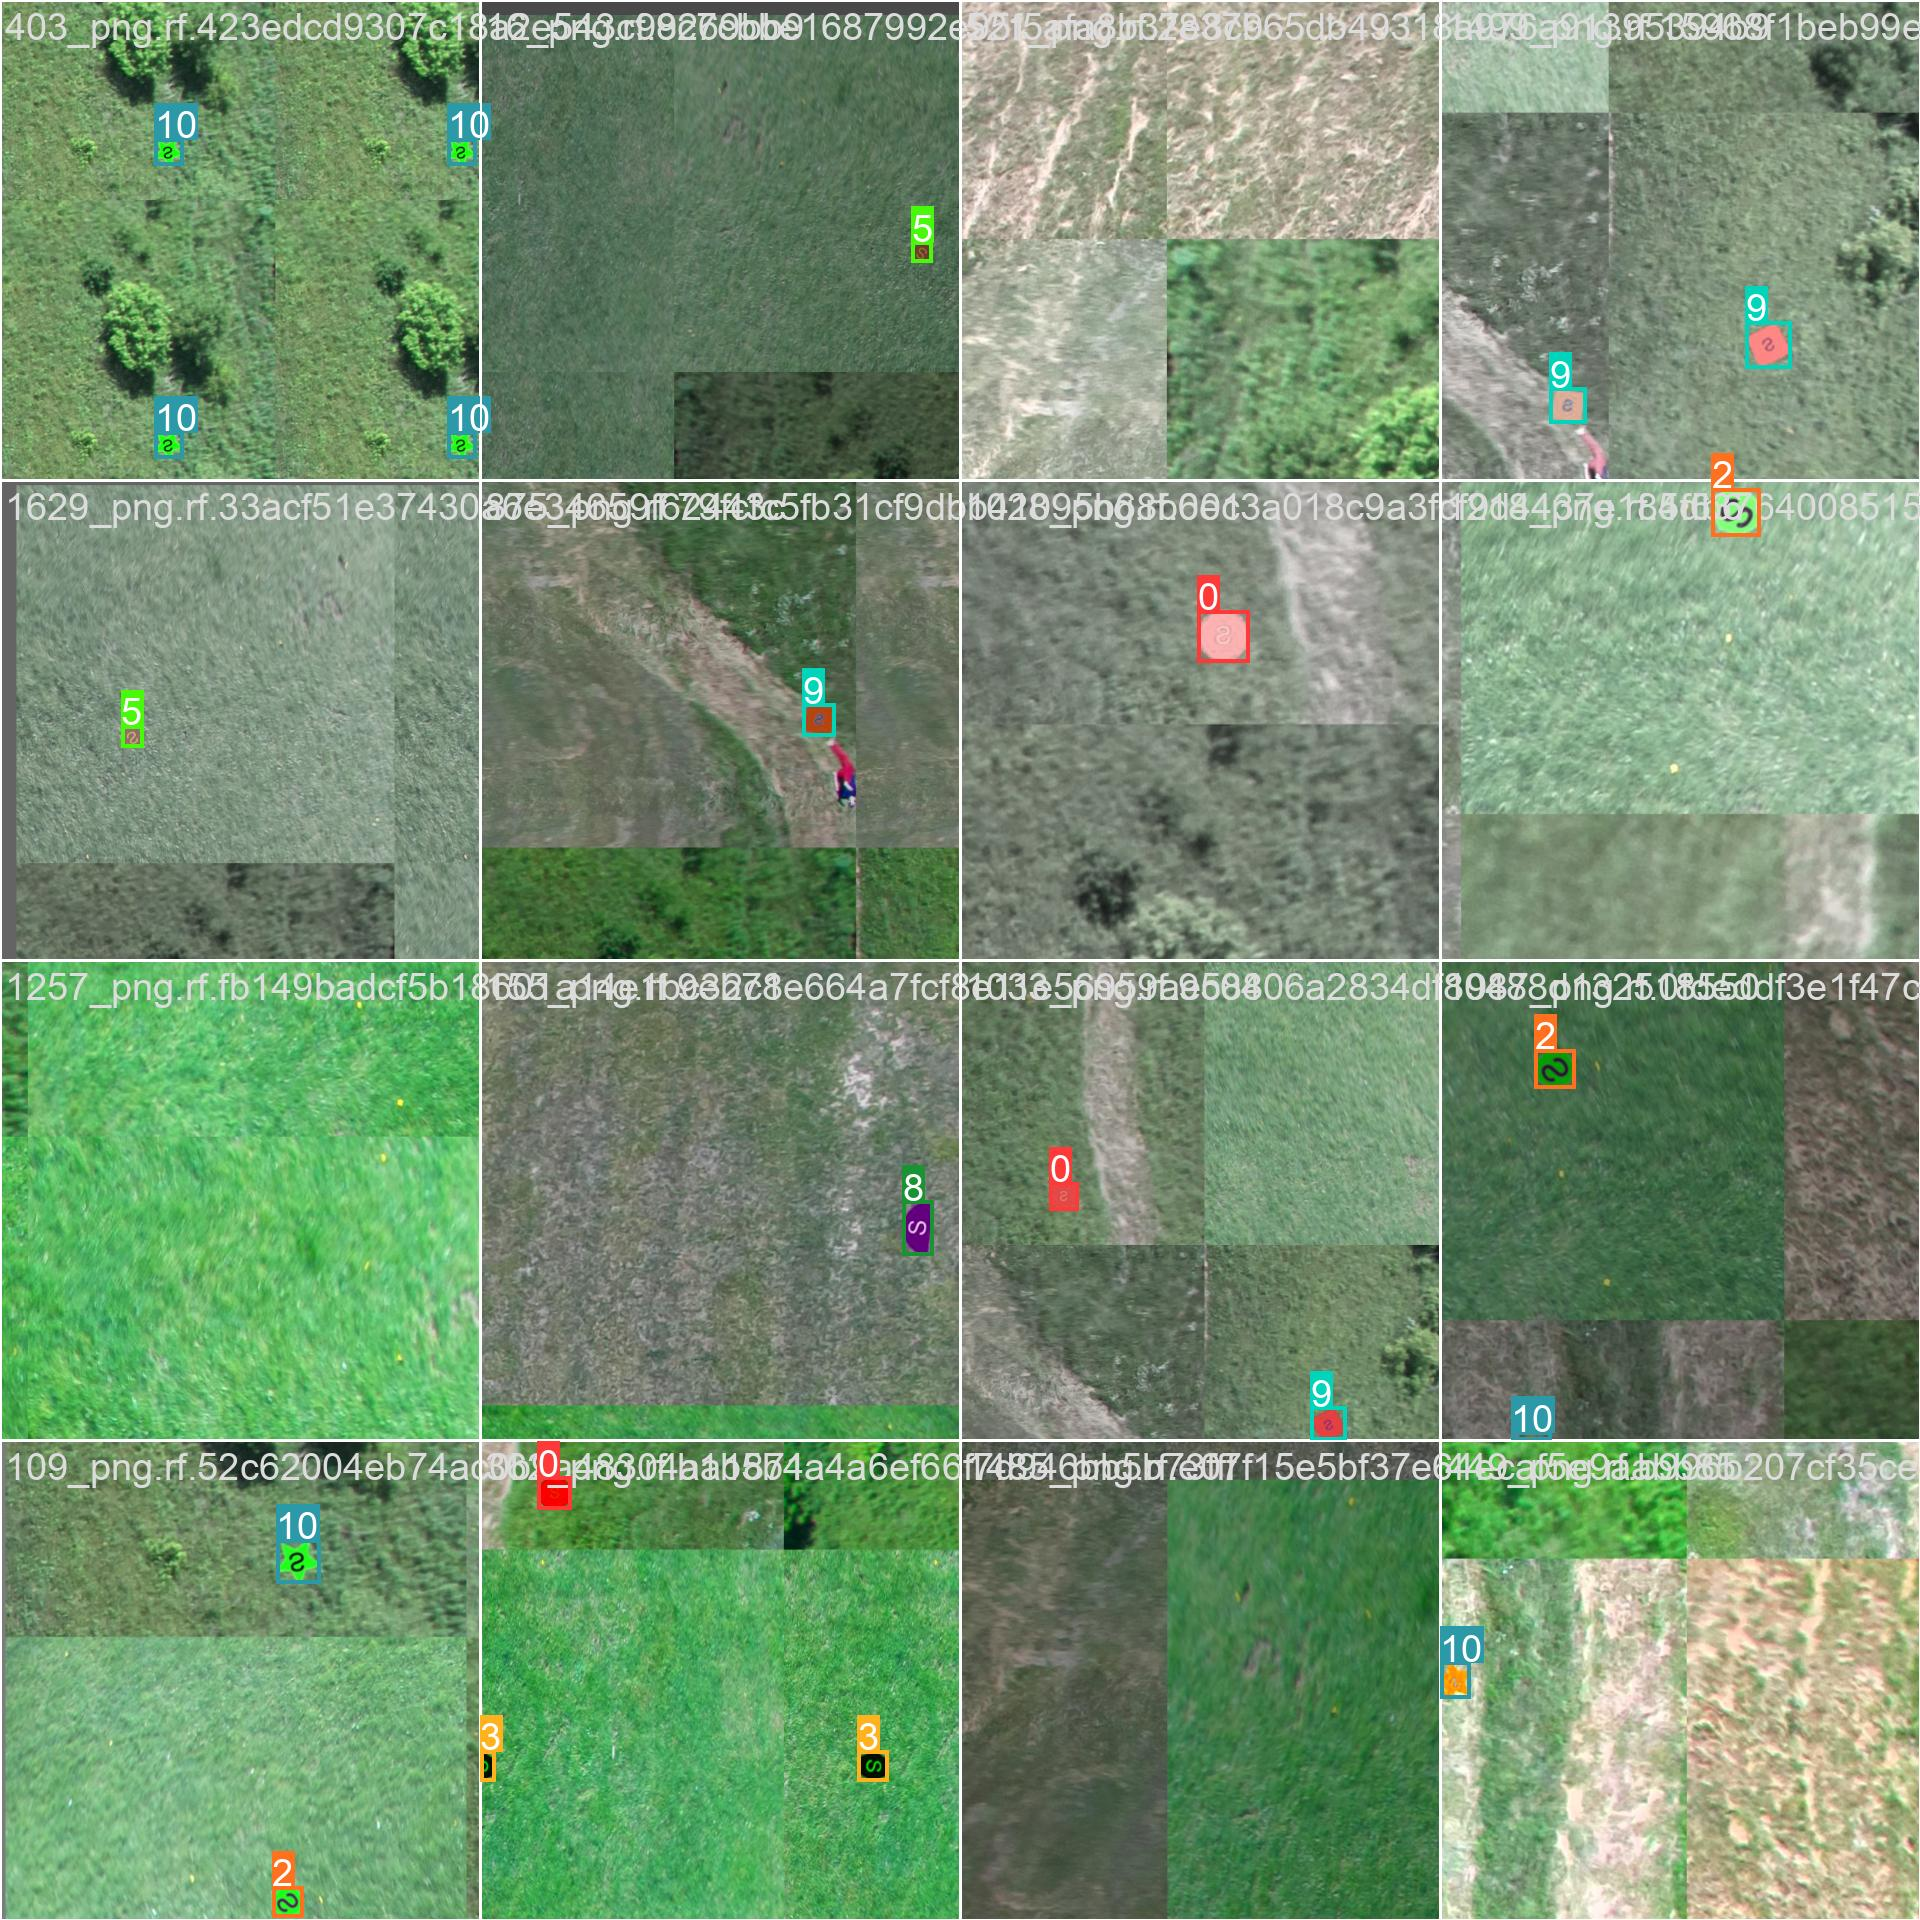

In [ ]:
# Show the train_batch

train_batch = cv2.imread('runs/detect/train/train_batch0.jpg')
cv2_imshow(train_batch)

# Step 3: Testing

In [14]:
metrics = model.predict(conf=0.4)

AttributeError: ignored

# Step 4: Inference

> ## Define inference function

In [ ]:
def inference(image):
  results = model.predict(image)

  # Iterate over the detected bounding boxes
  for result in results:
    annotator = Annotator(image)
    boxes = result.boxes
    for box in boxes:
      b = box.xyxy[0] # Get box coordinates
      c = box.cls
      annotator.box_label(b, model.names[int(c)])

  # Display the image with the drawn bounding boxes
  cv2_imshow(image)


0: 640x640 1 triangle, 7418.9ms
Speed: 3.8ms preprocess, 7418.9ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 640)


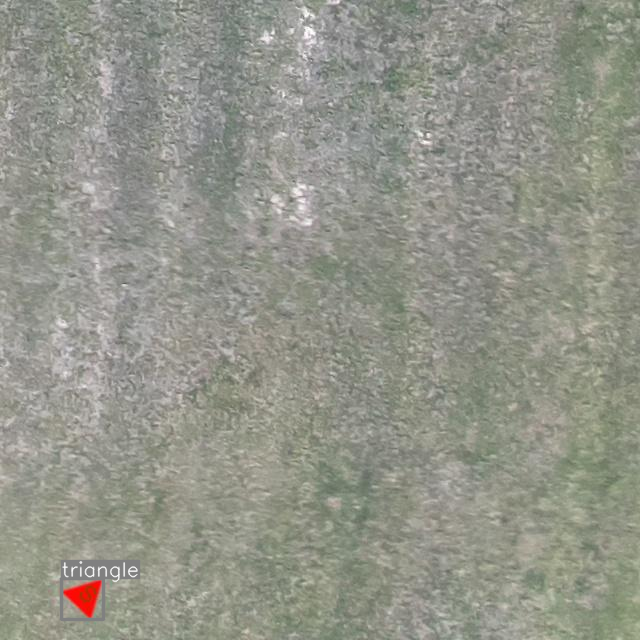

In [ ]:
image = cv2.imread('test/images/1079_png.rf.3ebf3c5d8fe90f9501caec3c82cb0113.jpg')
inference(image)